# <font style="color:#313151" face="Helvetica" > pyiron-atomistics </font>

---

<table border="0">
 <tr>
    <td style="width:60%"> <p style="width:100% color:gray;font-size:18px;text-align:right"> <a href="https://github.com/pyiron/pyiron_atomistics">pyiron-atomistics</a> provides integrations for atomistics tools enabling seamless cross-code workflows from jupyter notebooks.</p> </td>
    <td style="width:40%"><img src="img/logo.png" width="50%" align="justify"></td>
  </tr>
</table>

<table border="0">
 <tr>
    <td style="width:40%"><img src="img/calphy_logo.png" width="100%" align="justify"></td>
    <td style="width:60%"> <p style="width:100% color:gray;font-size:18px;text-align:justify"> Calphy is a Python code for automated calculation of free energies. It enables calculation of Helmholtz and Gibbs free energy for both solid and liquid phases at the given thermodynamic conditions using automated protocols </p> </td>
 </tr>
</table>

In [1]:
from pyiron_atomistics import Project

In [2]:
pr = Project('copper_demo')

### Step 1: Create a calphy job

In [3]:
sol = pr.create.job.Calphy("tm_fcc")

### Step 2: provide the input

Two major input parameters are needed:

1. Interatomic potential
2. Atomic structure

In [4]:
sol.potential = "2001--Mishin-Y--Cu-1--LAMMPS--ipr1"
sol.structure = pr.create.structure.ase.bulk('Cu', cubic=True).repeat(5)

In [5]:
sol.server.cores = 4

### Step 3: Free energy variation with temperature: melting point

In [6]:
sol.calc_free_energy(temperature=[1100, 1400], 
                     pressure=0, 
                     reference_phase="solid")
sol.run()

The job tm_fcc was saved and received the ID: 70


Liquid phase

In [8]:
lqd = pr.create.job.Calphy("tm_lqd", delete_aborted_job=True, delete_existing_job=True)
lqd.structure = sol.structure
lqd.potential = "2001--Mishin-Y--Cu-1--LAMMPS--ipr1"

In [10]:
lqd.calc_free_energy(temperature=[1100, 1400], 
                     pressure=0, 
                     reference_phase="liquid")
lqd.run()

The job tm_lqd was saved and received the ID: 71


In [13]:
import matplotlib.pyplot as plt

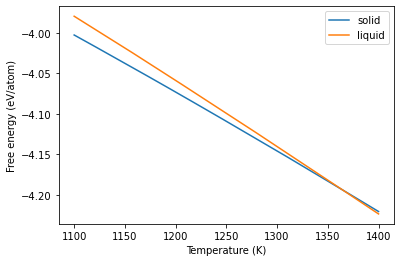

In [14]:
plt.plot(sol.output.temperature, sol.output.energy_free, label="solid")
plt.plot(lqd.output.temperature, lqd.output.energy_free, label="liquid")
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/atom)")
plt.legend()

### Some examples

#### Phase diagram of Titanium

<img src="img/cimg1.png" width="400">

#### Melting curve of Copper

<img src="img/cimg2.png" width="400">

#### Phase diagram of AuSi

<img src="img/cimg3.png" width="1000">

### Why integrate with pyiron?

<img src="img/Picture1.png" width="2000">

---

<img src="img/Picture2.png" width="2000">